In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datasets import InterviewDataset

ds = InterviewDataset('dataset')

# Overall stats

How many objects of each class (in the whole dataset):

In [2]:
print(ds.objs_by_class)

{0: 1028, 1: 1794}


How many images:

In [3]:
print(len(ds))

86


How many annotations per image:

In [4]:
min_annotations=float('inf')
max_annotations=0
total_annotations=0
for image_annotation in ds.annotations:
    n_objects = len(image_annotation[0])
    min_annotations = min(min_annotations, n_objects)
    max_annotations = max(max_annotations, n_objects)
    total_annotations += n_objects

print(total_annotations, total_annotations / len(ds), min_annotations, max_annotations)

2822 32.81395348837209 2 151


# Anchor box aspect ratio

To select the aspect ratio of anchor boxes for Faster RCNN, let's take a look at the aspect ratios of the object annotations in the provided dataset.

The `Dataset` class implemented for this dataset already computes aspect ratios, so we'll plot them on a histogram.

The dominant aspect ratio is 1:1, but to be safe, let's use anchor boxes of ratios 0.85, 1.0 and 1.15.

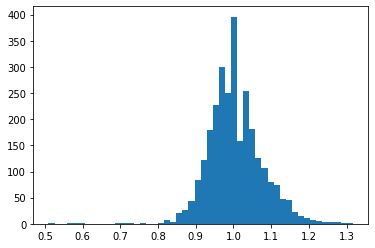

In [5]:
_ = plt.hist(ds.aspect_ratios, bins=50)

# Annotation sizes

In case we need this information to customize our model, let's plot the actual sizes of the object annotations.

In [6]:
points = pd.DataFrame(ds.annotation_dims_pixels,columns=['w','h'])
points.describe()

,w,h
count,2822.000000,2822.000000
mean,70.585796,70.769973
std,27.721963,28.791432
min,19.228800,19.152000
25%,50.819100,49.248000
50%,67.301000,65.664050
75%,86.530138,87.552000
max,234.867500,229.823900


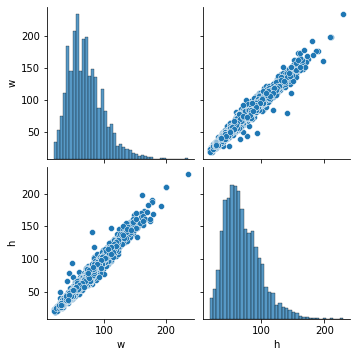

In [7]:
_ = sns.pairplot(points)